# Working with Temperature Data

In [68]:
!pip install tensorflow-gpu==2.0.0.alpha0

In [69]:
#this version of numpy is required to avoid an error related to numpy defaulting to not allowing pickle files
!pip install numpy==1.16.2

In [70]:
!pip install pandas==0.24

In [0]:
import tensorflow as tf
from tensorflow.keras import datasets, preprocessing, models, layers
import numpy as np
import pandas as pd

## Connect to Google Drive

In [72]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/temperature/jena_climate_2009_2016.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [75]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


## Set `Date Time` as the index

In [0]:
df = df[['Date Time', 'T (degC)']]
df['DateTime'] = pd.to_datetime(df['Date Time'], format="%d.%m.%Y %H:%M:%S")


In [77]:
df.head()

,Date Time,T (degC),DateTime
0,01.01.2009 00:10:00,-8.02,2009-01-01 00:10:00
1,01.01.2009 00:20:00,-8.41,2009-01-01 00:20:00
2,01.01.2009 00:30:00,-8.51,2009-01-01 00:30:00
3,01.01.2009 00:40:00,-8.31,2009-01-01 00:40:00
4,01.01.2009 00:50:00,-8.27,2009-01-01 00:50:00


In [78]:
df.set_index(['DateTime'])

,Date Time,T (degC)
DateTime,,
2009-01-01 00:10:00,01.01.2009 00:10:00,-8.02
2009-01-01 00:20:00,01.01.2009 00:20:00,-8.41
2009-01-01 00:30:00,01.01.2009 00:30:00,-8.51
2009-01-01 00:40:00,01.01.2009 00:40:00,-8.31
2009-01-01 00:50:00,01.01.2009 00:50:00,-8.27
2009-01-01 01:00:00,01.01.2009 01:00:00,-8.05
2009-01-01 01:10:00,01.01.2009 01:10:00,-7.62
2009-01-01 01:20:00,01.01.2009 01:20:00,-7.62
2009-01-01 01:30:00,01.01.2009 01:30:00,-7.91


## Import Charting Library

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
time_series_df = df.set_index(['DateTime'])

In [81]:
time_series_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420551 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 2 columns):
Date Time    420551 non-null object
T (degC)     420551 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.6+ MB


## Implement Slicing

In [0]:
jan_2009 = time_series_df['2009-01']

In [83]:
jan_2009['T (degC)'].head()

DateTime
2009-01-01 00:10:00   -8.02
2009-01-01 00:20:00   -8.41
2009-01-01 00:30:00   -8.51
2009-01-01 00:40:00   -8.31
2009-01-01 00:50:00   -8.27
Name: T (degC), dtype: float64

In [84]:
jan_2009.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4463 entries, 2009-01-01 00:10:00 to 2009-01-31 23:50:00
Data columns (total 2 columns):
Date Time    4463 non-null object
T (degC)     4463 non-null float64
dtypes: float64(1), object(1)
memory usage: 104.6+ KB


## Plot our Data

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


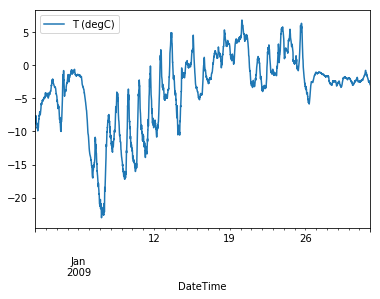

In [85]:
jan_2009.drop(['Date Time'], axis=1, inplace=True)
jan_2009.plot()

## Rate of Change

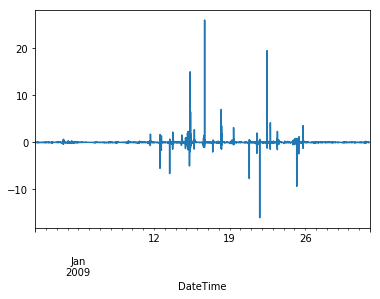

In [87]:
jan_2009['T (degC)'].pct_change().plot()

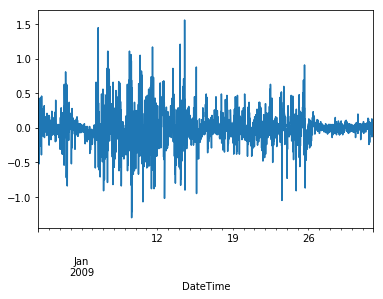

In [88]:
jan_2009['T (degC)'].diff().plot()

## Additional Slicing

In [19]:
all_jan = time_series_df[time_series_df.index.month == 1]
all_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35712 entries, 2009-01-01 00:10:00 to 2017-01-01 00:00:00
Data columns (total 2 columns):
Date Time    35712 non-null object
T (degC)     35712 non-null float64
dtypes: float64(1), object(1)
memory usage: 837.0+ KB


In [20]:
all_jan.tail()

,Date Time,T (degC)
DateTime,,
2016-01-31 23:20:00,31.01.2016 23:20:00,4.29
2016-01-31 23:30:00,31.01.2016 23:30:00,4.22
2016-01-31 23:40:00,31.01.2016 23:40:00,4.27
2016-01-31 23:50:00,31.01.2016 23:50:00,4.41
2017-01-01 00:00:00,01.01.2017 00:00:00,-4.82


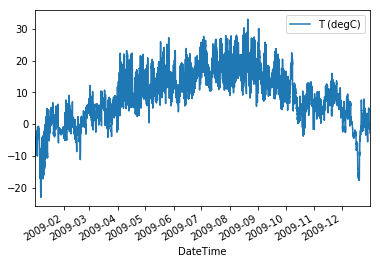

In [21]:
jan_dec_2009 = time_series_df['2009-01':'2009-12']
jan_dec_2009.plot()

In [0]:
all_2009 = time_series_df['2009']

## Resampling
### Frequency Conversion:
* Six Times an Hour to Hourly
* 24 Times a Day to 6 Times a Day
* 24 Times a Day to Daily
* Daily to Weekly

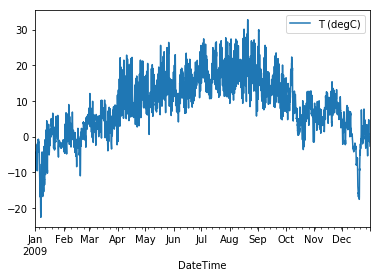

In [22]:
hourly_2009 = jan_dec_2009.resample('H').mean()
hourly_2009.plot()

In [23]:
hourly_2009.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2009-01-01 00:00:00 to 2009-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
T (degC)    8760 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


In [24]:
jan_dec_2009.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52557 entries, 2009-01-01 00:10:00 to 2009-12-31 23:50:00
Data columns (total 2 columns):
Date Time    52557 non-null object
T (degC)     52557 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ MB


In [25]:
daily_min_2009 = jan_dec_2009.resample('D').min()
daily_max_2009 = jan_dec_2009.resample('D').max()
daily_avg_2009 = jan_dec_2009.resample('D').mean()

daily_2009 = pd.DataFrame({"min": daily_min_2009['T (degC)'], "max": daily_max_2009['T (degC)'], "avg": daily_avg_2009['T (degC)']})
daily_2009.head()

,min,max,avg
DateTime,,,
2009-01-01,-9.91,-4.17,-6.810629
2009-01-02,-4.97,-2.12,-3.728194
2009-01-03,-10.00,-0.82,-5.271736
2009-01-04,-2.54,-0.63,-1.375208
2009-01-05,-12.54,-1.44,-4.867153


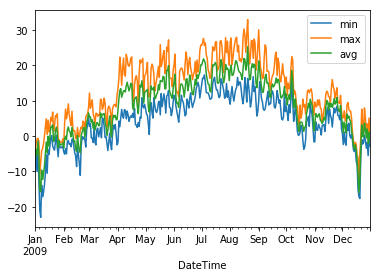

In [26]:
daily_2009.plot()

## Problem Definition

In [29]:
print(type(daily_2009['2009-01']['avg'].to_numpy()))

<class 'numpy.ndarray'>


In [30]:
print(daily_2009['2009-01']['avg'].to_numpy())

[ -6.81062937  -3.72819444  -5.27173611  -1.37520833  -4.86715278
 -15.48284722 -15.734375    -9.60916667 -12.30145833 -10.72826389
  -8.68166667  -5.38486111  -1.67819444  -4.68777778  -0.06097222
  -2.81576389   0.03965278   2.56284722   2.52479167   3.18354167
  -1.54805556  -1.12569444   1.46041667   2.58034722   0.98472222
  -3.28472222  -1.34423611  -2.49381944  -2.37104167  -2.39604167
  -2.00166667]


__problem :__ we have inputs, but no outputs, or features without labels

In [35]:
daily_avg_jan_2009 = daily_2009['2009-01']
daily_avg_jan_2009.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2009-01-01 to 2009-01-31
Freq: D
Data columns (total 3 columns):
min    31 non-null float64
max    31 non-null float64
avg    31 non-null float64
dtypes: float64(3)
memory usage: 992.0 bytes


In [37]:
daily_avg_jan_2009.drop(['min', 'max'], axis=1, inplace=True)
daily_avg_jan_2009.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2009-01-01 to 2009-01-31
Freq: D
Data columns (total 1 columns):
avg    31 non-null float64
dtypes: float64(1)
memory usage: 496.0 bytes


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
daily_avg_jan_2009.head()

,avg
DateTime,
2009-01-01,-6.810629
2009-01-02,-3.728194
2009-01-03,-5.271736
2009-01-04,-1.375208
2009-01-05,-4.867153


In [0]:
daily_avg_jan_2009.reset_index(inplace=True)

In [53]:
daily_avg_jan_2009.head()

,DateTime,avg
0,2009-01-01,-6.810629
1,2009-01-02,-3.728194
2,2009-01-03,-5.271736
3,2009-01-04,-1.375208
4,2009-01-05,-4.867153


In [63]:
daily_avg_jan_2009.reset_index(inplace=True)
daily_avg_jan_2009.head()

,index,DateTime,avg
0,0,2009-01-01,-6.810629
1,1,2009-01-02,-3.728194
2,2,2009-01-03,-5.271736
3,3,2009-01-04,-1.375208
4,4,2009-01-05,-4.867153


In [0]:
jan_2009_ndarray = daily_avg_jan_2009[['index', 'avg']].to_numpy()

In [65]:
print(jan_2009_ndarray.shape)

(31, 2)


In [67]:
print(jan_2009_ndarray)

[[  0.          -6.81062937]
 [  1.          -3.72819444]
 [  2.          -5.27173611]
 [  3.          -1.37520833]
 [  4.          -4.86715278]
 [  5.         -15.48284722]
 [  6.         -15.734375  ]
 [  7.          -9.60916667]
 [  8.         -12.30145833]
 [  9.         -10.72826389]
 [ 10.          -8.68166667]
 [ 11.          -5.38486111]
 [ 12.          -1.67819444]
 [ 13.          -4.68777778]
 [ 14.          -0.06097222]
 [ 15.          -2.81576389]
 [ 16.           0.03965278]
 [ 17.           2.56284722]
 [ 18.           2.52479167]
 [ 19.           3.18354167]
 [ 20.          -1.54805556]
 [ 21.          -1.12569444]
 [ 22.           1.46041667]
 [ 23.           2.58034722]
 [ 24.           0.98472222]
 [ 25.          -3.28472222]
 [ 26.          -1.34423611]
 [ 27.          -2.49381944]
 [ 28.          -2.37104167]
 [ 29.          -2.39604167]
 [ 30.          -2.00166667]]
